In [1]:
import sympy as sym
from sympy.polys import subresultants_qq_zz

sym.init_printing()

In [2]:
assert sym.__version__ == '1.1.1'

In [3]:
import imp
sylvester = imp.load_source('sylvester', '../src/sylvesters.py')

Resultant
----------

If $p$ and $q$ are two polynomials over a commutative ring with identity which can be factored into linear factors,

$$p(x)=a_0(x−r_1)(x−r_2)\dots(x−r_m)$$

$$q(x)=b_0(x−s_1)(x−s_2)\dots(x−s_n)$$

then the resultant $R(p,q)$ of p and q is defined as:

$$R(p,q)=a^n_{0}b^m_{0}\prod_{i=1}^{m}\prod_{j=1}^{n}(r_i−s_j)$$

Since the resultant is a symmetric function of the roots of the polynomials $p$ and $q$, it can be expressed as a polynomial in the coefficients of $p$ and $q$.

It was proven that the determinant of the Sylvester's matrix is equal to the resultant. Resultants are very useful for solving simultaneous systems of polynomial equations. When the resultant is equal to 0 we not to have found a common root for $p$ and $q$. Furthermore, when we have system of two variables we solve for one and the second is kept as a coefficient. Thus we can find the roots of the equations, that is why the resultant is often refeered to as the eliminator.

Sylvester's Resultant
---------------------

-  $$p(x)=a_0x_m + a_1x_m−1+\dots+a_{m−1}x+a_m$$
-  $$q(x)=b_0x_n + b_1x_{n−1}+\dots+b_{n−1}x+b_n$$

Then $R(p,q)$ can be expressd as an $(m+n)\times(m+n)$ determinant:

$$\left|\begin{matrix}a_{0}&a_{1}&a_{2}&\ldots&a_{m}&0&\ldots&0\cr 0&a_{0}&a_{1}%
&\ldots&a_{{m-1}}&a_{m}&\ldots&0\cr&&\ddots&.&.&.&.&.\cr 0&0&.&.&.&.&.&a_{m}%
\cr b_{0}&b_{1}&b_{2}&\ldots&b_{n}&0&\ldots&0\cr 0&b_{0}&b_{1}&\ldots&b_{{n-1}%
}&b_{n}&\ldots&0\cr&&\ddots&.&.&.&.&.\cr 0&0&.&.&.&.&.&b_{n}\cr\end{matrix}%
\right|=R(p,q)$$

Example 1
---------

In [4]:
x = sym.symbols('x')

In [5]:
f = x ** 2 - 5 * x + 6
g = x ** 2 - 3 * x + 2

In [6]:
f, g

In [7]:
type(f)

sympy.core.add.Add

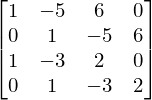

In [8]:
my_matrix = sylvester.sylvester_matrix(f, g, x)
my_matrix

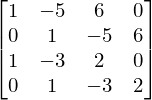

In [9]:
subresultants_qq_zz.sylvester(f, g, x)

In [10]:
my_matrix.det()

Examples 2 
--------------

In [11]:
z = x ** 2 - 7 * x + 12
h = x ** 2 - x

In [12]:
z, h

In [13]:
matrix = sylvester.sylvester_matrix(z, h, x)
matrix.det()

Example 3
----------

In [14]:
y = sym.symbols('y')

In [15]:
f = x ** 2 + x * y + 2 * x + y -1
g = x ** 2 + 3 * x - y ** 2 + 2 * y - 1
f, g

In [16]:
matrix = sylvester.sylvester_matrix(f, g, y)

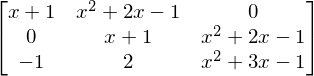

In [17]:
matrix

In [18]:
my_matrix.det().factor()

Three roots for x $\in \{-3, 0, 1\}$.

For $x=-3$ then $y=1$.

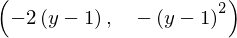

In [19]:
f.subs({x:-3}).factor(), g.subs({x:-3}).factor()

In [20]:
f.subs({x:-3, y:1}), g.subs({x:-3, y:1})

For $x=0$ the $y=1$.

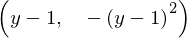

In [21]:
f.subs({x:0}).factor(), g.subs({x:0}).factor()

In [22]:
f.subs({x:0, y:1}), g.subs({x:0, y:1})

For $x=1$ then $y=-1$ is the common root,

In [23]:
f.subs({x:1}).factor(), g.subs({x:1}).factor()

In [24]:
f.subs({x:1, y:-1}), g.subs({x:1, y:-1})

In [25]:
f.subs({x:1, y:3}), g.subs({x:1, y:3})

Example 4
---------

In [26]:
f = x ** sym.S(2) + y - sym.S(3) * x * y ** sym.S(2) + x ** sym.S(2) - sym.S(3) * x * y
g = x ** sym.S(3) + y + x ** sym.S(3) - sym.S(4) * y ** sym.S(2) - sym.S(3) * y + sym.S(1)

In [27]:
f, g

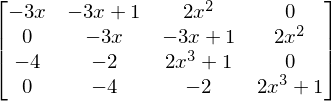

In [28]:
matrix = subresultants_qq_zz.sylvester(f, g, y)
matrix

In [29]:
x_roots = [sym.N(root) for root in sym.solveset(matrix.det())]
x_roots

For $x$ first root,

In [30]:
y_roots = list(sym.solveset(f.subs({x:x_roots[0]}).factor()))
y_roots

In [31]:
sym.solveset(g.subs({x:x_roots[0]}).factor())

In [32]:
f.subs({x:x_roots[0], y:y_roots[1]}), g.subs({x:x_roots[0], y:y_roots[1]})

For $x$ second root,

In [33]:
y_roots = list(sym.solveset(f.subs({x:x_roots[1]}).factor()))
y_roots

In [34]:
sym.solveset(g.subs({x:x_roots[1]}).factor())

In [35]:
f.subs({x:x_roots[1], y:y_roots[0]}), g.subs({x:x_roots[1], y:y_roots[0]})

Generic Example
-----------------

In [36]:
a = sym.IndexedBase("a")
b = sym.IndexedBase("b")

In [37]:
f = a[1] * x + a[0]
g = b[2] * x ** 2 + b[1] * x + b[0]

In [39]:
matrix = sylvester.sylvester_matrix(f, g, x)

In [40]:
matrix.det()